In [25]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
SAVEFIG = True

## Load Stimuli and Semantic Matrix

In [26]:
with open("simu4_data/simu4_design.pkl", "rb") as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

In [27]:
# df_study = df_study.loc[df_study.session < 100]  # for testing
df_study

,itemno,item,itemno_old,freq,quantile,session
0,316,FARM,552,1161,8,0
1,477,LEOPARD,812,118,3,0
2,433,INSTRUCTOR,741,78,2,0
3,87,BOTTLE,153,1479,8,0
4,84,BOOT,150,149,3,0
...,...,...,...,...,...,...
99995,895,TOWN,1491,3328,9,999
99996,633,PIANO,1057,466,6,999
99997,843,SUBMARINE,1398,154,3,999
99998,462,LABYRINTH,791,32,0,999


In [28]:
# df_test = df_test.loc[df_test.session < 100]  # for testing
df_test

,itemno,item,itemno_old,freq,quantile,session,old
0,341,FORT,595,411,6,0,True
1,512,MANSION,864,156,3,0,True
2,66,BENCH,121,345,6,0,True
3,386,GUARD,667,658,7,0,False
4,57,BEE,112,185,4,0,True
...,...,...,...,...,...,...,...
199995,503,LUNG,850,169,4,999,True
199996,891,TORNADO,1485,34,0,999,False
199997,932,VEHICLE,1553,383,6,999,False
199998,735,RUG,1215,321,5,999,True


In [29]:
s_mat = np.load("simu4_data/simu4_smat.npy")

## Run CMR-IA

In [30]:
# define parameters - copy from pso fitting
params = cmr.make_default_params()
params.update(
    beta_enc=0.0233645,
    beta_cue=0.93350279,
    beta_distract=0.14106648,
    gamma_fc=0.75152814,
    s_fc=0.08476893,
    c_thresh_itm=0.12888085,
    use_new_context=True,
)
params

{'beta_enc': 0.0233645,
 'beta_rec': 0.5,
 'beta_cue': 0.93350279,
 'beta_rec_post': 0.5,
 'beta_distract': 0.14106648,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.08476893,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.12888085,
 'c_thresh_ass': 0.5,
 'd_ass': 1,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.75152814,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [31]:
# run the model
df_simu = cmr.run_norm_recog_multi_sess(params, df_study, df_test, s_mat)
df_simu

CMR Time: 32.906652212142944


,session,itemno,s_resp,s_rt,csim
0,0,341,1.0,1183.191162,0.171951
1,0,512,1.0,11.953435,0.401699
2,0,66,1.0,25.788313,0.363254
3,0,386,0.0,1468.057007,0.096597
4,0,57,1.0,1587.744751,0.157246
...,...,...,...,...,...
199995,999,503,1.0,1318.960693,0.166520
199996,999,891,0.0,1667.410034,0.102963
199997,999,932,0.0,1277.222900,0.089634
199998,999,735,0.0,1660.574829,0.102758


In [32]:
# merge to get more info
df_simu = df_simu.merge(df_test, on=["session", "itemno"])
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old
0,0,341,1.0,1183.191162,0.171951,FORT,595,411,6,True
1,0,512,1.0,11.953435,0.401699,MANSION,864,156,3,True
2,0,66,1.0,25.788313,0.363254,BENCH,121,345,6,True
3,0,386,0.0,1468.057007,0.096597,GUARD,667,658,7,False
4,0,57,1.0,1587.744751,0.157246,BEE,112,185,4,True
...,...,...,...,...,...,...,...,...,...,...
199995,999,503,1.0,1318.960693,0.166520,LUNG,850,169,4,True
199996,999,891,0.0,1667.410034,0.102963,TORNADO,1485,34,0,False
199997,999,932,0.0,1277.222900,0.089634,VEHICLE,1553,383,6,False
199998,999,735,0.0,1660.574829,0.102758,RUG,1215,321,5,True


In [33]:
df_simu.to_pickle("simu4_data/simu4_result_ctrl.pkl")

## Analysis

In [34]:
with open("simu4_data/simu4_result_ctrl.pkl", "rb") as inp:
    df_simu = pickle.load(inp)

In [35]:
df_simu.groupby(["old"]).s_resp.mean()

old
False    0.16340
True     0.87297
Name: s_resp, dtype: float64

In [36]:
# get wordfreq quantile
with open("simu4_data/simu4_word_freq.pkl", "rb") as inp:
    df = pickle.load(inp)
df

,item,itemno_old,itemno,freq,quantile
0,ABDOMEN,1,1,110,2
1,ACROBAT,4,2,17,0
2,ADULT,8,3,906,8
3,ALLEY,15,4,165,4
4,ALLIGATOR,16,5,12,0
...,...,...,...,...,...
979,YOKE,1632,980,12,0
980,YOLK,1633,981,47,1
981,YOUTH,1634,982,1159,8
982,ZIPPER,1636,983,24,0


In [37]:
# check mean frequency of each group
freq_mean = df.groupby("quantile").freq.mean().to_numpy()
freq_mean = np.around(freq_mean, decimals=0)
freq_mean

array([  21.,   51.,   90.,  141.,  196.,  284.,  415.,  632., 1163.,
       4332.])

### Csim

In [38]:
# check the recognition threshold for each group
s_mean = np.mean(s_mat, axis=1)
c_vec_cal = params["c1"] * s_mean + params["c_thresh_itm"]
df["c_vec"] = c_vec_cal
df.groupby("quantile").c_vec.mean()

quantile
0    0.128881
1    0.128881
2    0.128881
3    0.128881
4    0.128881
5    0.128881
6    0.128881
7    0.128881
8    0.128881
9    0.128881
Name: c_vec, dtype: float64

In [39]:
# separate hf and lf
create_level = {0: "new lf", 1: "new hf", 2: "old lf", 3: "old hf"}
df_simu["hf"] = df_simu["quantile"] >= 5
df_simu["level"] = df_simu.apply(lambda x: create_level[x["old"] * 2 + x["hf"]], axis=1)
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old,hf,level
0,0,341,1.0,1183.191162,0.171951,FORT,595,411,6,True,True,old hf
1,0,512,1.0,11.953435,0.401699,MANSION,864,156,3,True,False,old lf
2,0,66,1.0,25.788313,0.363254,BENCH,121,345,6,True,True,old hf
3,0,386,0.0,1468.057007,0.096597,GUARD,667,658,7,False,True,new hf
4,0,57,1.0,1587.744751,0.157246,BEE,112,185,4,True,False,old lf
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,999,503,1.0,1318.960693,0.166520,LUNG,850,169,4,True,False,old lf
199996,999,891,0.0,1667.410034,0.102963,TORNADO,1485,34,0,False,False,new lf
199997,999,932,0.0,1277.222900,0.089634,VEHICLE,1553,383,6,False,True,new hf
199998,999,735,0.0,1660.574829,0.102758,RUG,1215,321,5,True,True,old hf


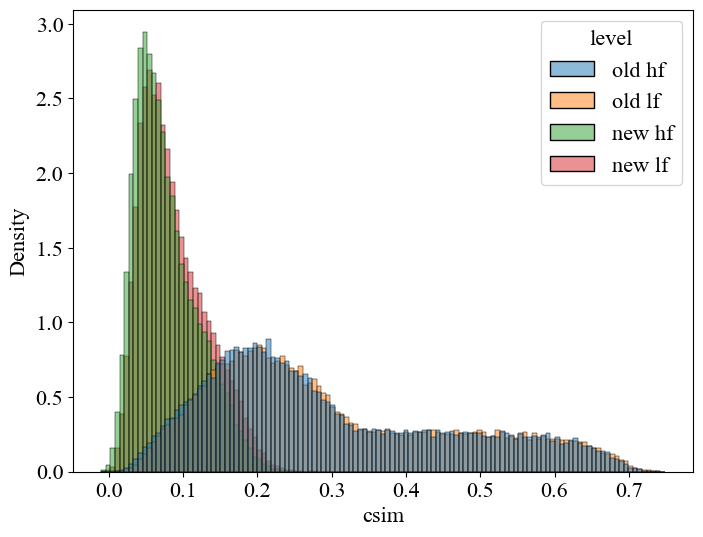

In [40]:
# plot the csim distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(df_simu, x="csim", hue="level", alpha=0.5, ax=ax, stat="density")
plt.show()

In [41]:
# check the csim of each group
df_tmp = df_simu.groupby(["old", "quantile"]).csim.mean().to_frame().reset_index()
df_tmp = pd.pivot_table(data=df_tmp, values="csim", columns="old", index="quantile").reset_index()
df_tmp["True-False"] = df_tmp[True] - df_tmp[False]
df_tmp["c_vec"] = df.groupby("quantile").c_vec.mean()
df_tmp

old,quantile,False,True,True-False,c_vec
0,0,0.089068,0.301268,0.212200,0.128881
1,1,0.091463,0.305137,0.213674,0.128881
2,2,0.087692,0.299728,0.212036,0.128881
3,3,0.084714,0.300572,0.215858,0.128881
4,4,0.084732,0.296365,0.211633,0.128881
5,5,0.082712,0.298453,0.215741,0.128881
6,6,0.081040,0.295490,0.214450,0.128881
7,7,0.077501,0.294783,0.217282,0.128881
8,8,0.073214,0.294432,0.221217,0.128881
9,9,0.072170,0.292716,0.220546,0.128881


### Yes Rate

In [42]:
# session-wise, get yes rate for each condition
df_sess_q = df_simu.groupby(["session", "quantile", "old"]).s_resp.mean().to_frame(name="yes_rate").reset_index()
df_sess_q

,session,quantile,old,yes_rate
0,0,0,False,0.222222
1,0,0,True,0.625000
2,0,1,False,0.461538
3,0,1,True,1.000000
4,0,2,False,0.307692
...,...,...,...,...
19995,999,7,True,0.636364
19996,999,8,False,0.125000
19997,999,8,True,0.818182
19998,999,9,False,0.100000


In [43]:
# collapse across session
df_q = df_sess_q.groupby(["quantile", "old"]).yes_rate.mean().to_frame().reset_index()
df_q

,quantile,old,yes_rate
0,0,False,0.196332
1,0,True,0.879377
2,1,False,0.216424
3,1,True,0.884782
4,2,False,0.189041
5,2,True,0.874358
6,3,False,0.169180
7,3,True,0.883189
8,4,False,0.174345
9,4,True,0.869324


In [44]:
# format df for plotting
df_plot = pd.pivot_table(df_q, values="yes_rate", index="quantile", columns="old").reset_index()
df_plot.rename(columns={False: "far", True: "hr"}, inplace=True)
df_plot["freq_mean"] = freq_mean
df_plot

old,quantile,far,hr,freq_mean
0,0,0.196332,0.879377,21.0
1,1,0.216424,0.884782,51.0
2,2,0.189041,0.874358,90.0
3,3,0.169180,0.883189,141.0
4,4,0.174345,0.869324,196.0
5,5,0.165351,0.875096,284.0
6,6,0.159314,0.870276,415.0
7,7,0.133290,0.865621,632.0
8,8,0.126735,0.863337,1163.0
9,9,0.106410,0.864562,4332.0


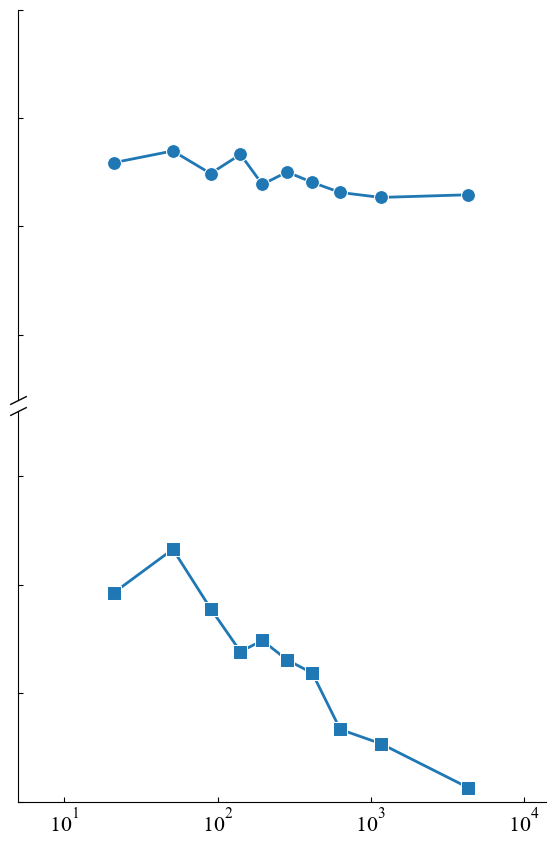

In [45]:
# plot
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 9))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)
fig.subplots_adjust(hspace=0.03)

sns.lineplot(data=df_plot, y="hr", x="freq_mean", ax=ax1, marker="o", color="C0", markersize=10, linewidth=2)
sns.lineplot(data=df_plot, y="far", x="freq_mean", ax=ax2, marker="s", color="C0", markersize=10, linewidth=2)

ax1.set_ylim(0.77, 0.95)
ax1.set_yticks(np.arange(0.80, 0.96, 0.05))
ax2.set_ylim(0.1, 0.28)
ax2.set_yticks(np.arange(0.1, 0.30, 0.05))
ax1.tick_params(axis="y", direction="in")
ax1.tick_params(axis="x", direction="in")
ax2.tick_params(axis="y", direction="in")
ax2.tick_params(axis="x", direction="in")
plt.xscale("log")
plt.xlim(5, 14000)

ax1.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.right.set_visible(False)
ax1.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False, labeltop=False)
ax2.minorticks_off()

d = 0.5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color="k", mec="k", mew=1, clip_on=False)
ax1.plot(0, 0, transform=ax1.transAxes, **kwargs)
ax2.plot(0, 1, transform=ax2.transAxes, **kwargs)

ax1.set_ylabel("hit rate")
ax2.set_ylabel("false alarm rate")
ax2.set_xlabel("word frequency")

# plt.tight_layout(h_pad = 0)
if SAVEFIG:
    ax1.set_ylabel(None)
    ax1.set_xlabel(None)
    ax2.set_ylabel(None)
    ax2.set_xlabel(None)
    ax1.tick_params(labelleft=False)
    ax2.tick_params(labelleft=False)
    plt.savefig("simu4_fig/simu4_WFE_ctrl.pdf")
plt.show()

### d-prime

In [46]:
# session-wise, get z yes rate for each condition
df_sess_q_adj = df_simu.groupby(["session", "quantile", "old"]).s_resp.aggregate(["sum", "count"]).reset_index()
df_sess_q_adj["yes_rate_adj"] = (df_sess_q_adj["sum"] + 0.5) / (df_sess_q_adj["count"] + 1)
df_sess_q_adj["z_yes_rate"] = sp.stats.norm.ppf(df_sess_q_adj["yes_rate_adj"])
df_sess_q_adj

,session,quantile,old,sum,count,yes_rate_adj,z_yes_rate
0,0,0,False,2.0,9,0.250000,-0.674490
1,0,0,True,5.0,8,0.611111,0.282216
2,0,1,False,6.0,13,0.464286,-0.089642
3,0,1,True,11.0,11,0.958333,1.731664
4,0,2,False,4.0,13,0.321429,-0.463708
...,...,...,...,...,...,...,...
19995,999,7,True,7.0,11,0.625000,0.318639
19996,999,8,False,1.0,8,0.166667,-0.967422
19997,999,8,True,9.0,11,0.791667,0.812218
19998,999,9,False,1.0,10,0.136364,-1.096804


In [47]:
# collapse across session
df_q_adj = df_sess_q_adj.groupby(["quantile", "old"]).z_yes_rate.mean().to_frame().reset_index()
df_q_adj = pd.pivot_table(df_q_adj, values="z_yes_rate", index="quantile", columns="old").reset_index()
df_q_adj.rename(columns={False: "z_far", True: "z_hr"}, inplace=True)
df_q_adj["dprime"] = df_q_adj["z_hr"] - df_q_adj["z_far"]
df_q_adj["freq_mean"] = freq_mean
df_q_adj

old,quantile,z_far,z_hr,dprime,freq_mean
0,0,-0.811949,1.077152,1.889100,21.0
1,1,-0.755617,1.107696,1.863314,51.0
2,2,-0.845335,1.074968,1.920303,90.0
3,3,-0.915069,1.102332,2.017400,141.0
4,4,-0.900489,1.049605,1.950093,196.0
5,5,-0.929932,1.078741,2.008672,284.0
6,6,-0.944323,1.049169,1.993492,415.0
7,7,-1.046281,1.040763,2.087044,632.0
8,8,-1.066533,1.025425,2.091958,1163.0
9,9,-1.147981,1.032361,2.180342,4332.0


### Error Check

In [48]:
# Get behavioral stats and compare with ground truth
hr = df_plot.hr.to_numpy()
far = df_plot.far.to_numpy()
hr_gt = np.array([0.903, 0.885, 0.888, 0.880, 0.879, 0.880, 0.870, 0.862, 0.842, 0.837])
far_gt = np.array([0.114, 0.132, 0.143, 0.164, 0.171, 0.183, 0.187, 0.193, 0.192, 0.193])
err = np.mean(np.power(hr - hr_gt, 2)) + np.mean(np.power(far - far_gt, 2))
err

0.0034564670575538458